In [455]:
include("sim.jl")

simulate_pomdp (generic function with 1 method)

In [ ]:
@time roadway, policy, scenes, headings = simulate_pomdp()

mdp.model.long_model.a = 0.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = -2.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = 0.0
mdp.model.long_model.a = -1.0
mdp.model.long_model.a = -1.0
mdp.model.long_mod

(get_lane(roadway, (scenes[end])[1])).tag.lane = 3
length(scenes) = 99


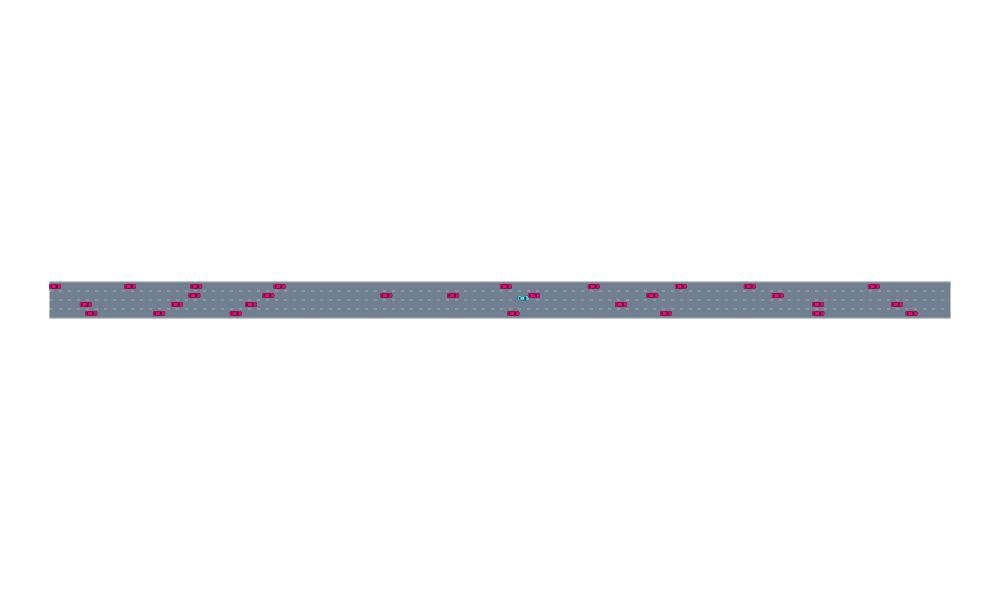

In [449]:
@show get_lane(roadway, scenes[end][1]).tag.lane
@show length(scenes)
car_colors = Dict{Int,Colorant}(1 => colorant"0x52E3F6")
render(scenes[end], roadway, cam = FitToContentCamera(), car_colors=car_colors) # CarFollowCamera(1)

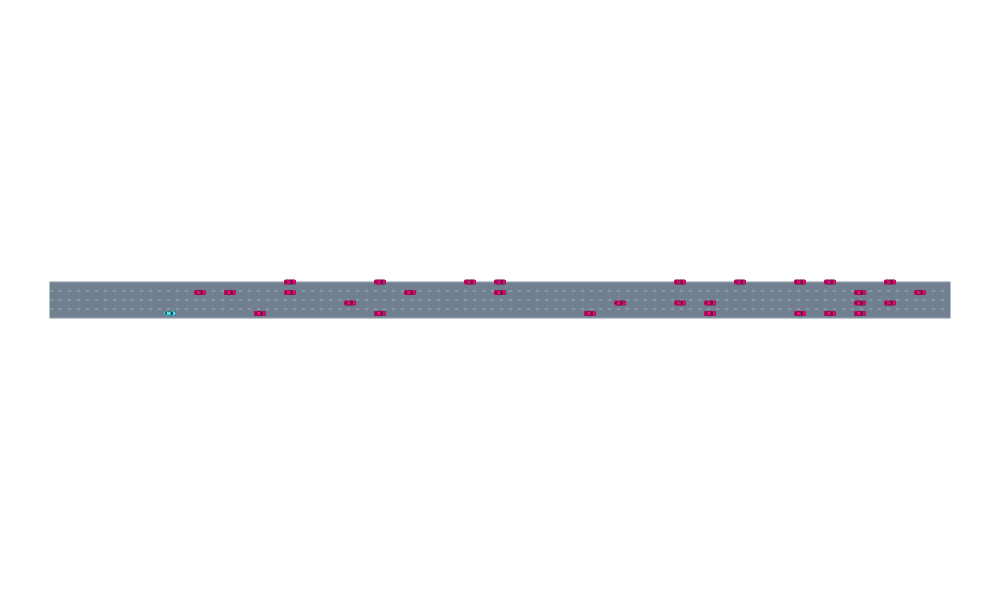

In [450]:
render(scenes[1], roadway, cam = FitToContentCamera(), car_colors=car_colors)

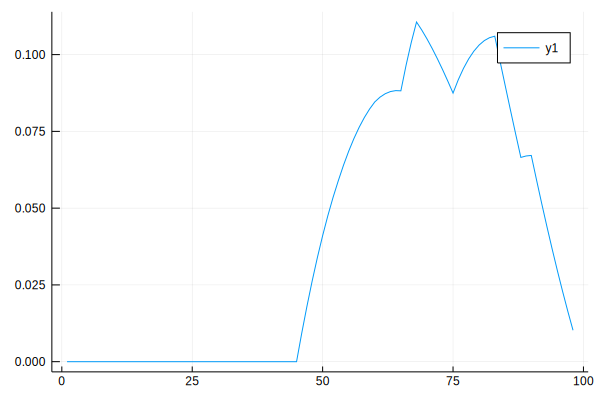

In [451]:
using Plots
plot(headings)

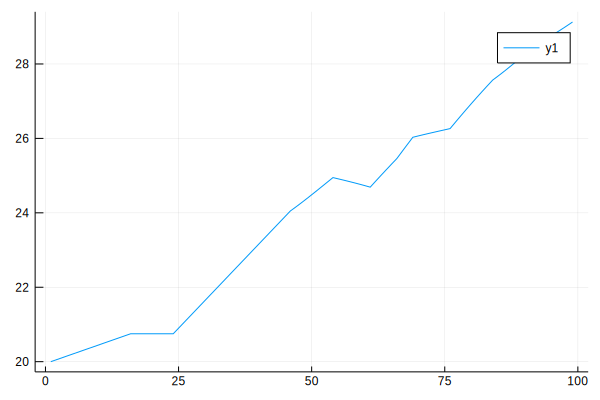

In [452]:
vels = []
for i=1:length(scenes)
    push!(vels, scenes[i][1].state.v)
end
plot(vels)

In [358]:
num_goal = 0
num_fail = 0
num_collisions = 0
num_timeouts = 0
nlanes = 4
ntrials = 100
vehicle_width = scenes[end][1].def.width
lane_break_distance = DEFAULT_LANE_WIDTH / 2 - vehicle_width / 2
for i = 1:ntrials
    roadway, policy, scenes = simulate_pomdp()
    if get_lane(roadway, scenes[end][1].state).tag.lane == nlanes && abs(scenes[end][1].state.posF.ϕ) < pi/6 && abs(scenes[end][1].state.posF.t) < lane_break_distance
        num_goal += 1
    else
        num_fail += 1
        if collision_checker(scenes[end], EGO_ID) 
            num_collisions += 1
        else
            num_timeouts += 1
        end
    end
end

"collision" = "collision"
r = -9933.735505531955
"finish line" = "finish line"
r = 9987.763821061777
"end of road" = "end of road"
r = 96.8138218178386
"collision" = "collision"
r = -9951.631175373757
"end of road" = "end of road"
r = -2.6750134300529282
"collision" = "collision"
r = -9925.847005161771
"finish line" = "finish line"
r = 11861.964236171945
"finish line" = "finish line"
r = 11064.836638810564
"collision" = "collision"
r = -9965.370165760105
"finish line" = "finish line"
r = 11763.411059935417
"finish line" = "finish line"
r = 11247.073446086873
"finish line" = "finish line"
r = 11707.38383142819
"finish line" = "finish line"
r = 11076.325380435783
"collision" = "collision"
r = -9991.492711175622
"finish line" = "finish line"
r = 11067.959274044139
"collision" = "collision"
r = -9912.431719764454
"finish line" = "finish line"
r = 11427.259143963422
"end of road" = "end of road"
r = -928.877152169315
"finish line" = "finish line"
r = 11127.950176717655
"finish line" = "fini

InterruptException: InterruptException:

In [359]:
@show num_goal
@show num_fail
@show num_collisions
@show num_timeouts

num_goal = 16
num_fail = 16
num_collisions = 12
num_timeouts = 4


4

In [ ]:
# d 20, c 5, i 500: 2-8
# d 50, c 5, i 500: 0-10
# d 20, c 10, i 500: 3-7
# d 20, c 15, i 500: 3-7
# d 20, c 10, i 750: 0-10

In [25]:
using D3Trees
mdp = laneChangeMDP()
state = initialstate(mdp, MersenneTwister(0))
solver = MCTSSolver(n_iterations=500, depth=20, exploration_constant=10.0)
planner = solve(solver, mdp)
D3Tree(policy, planner, init_expand=2)

MethodError: MethodError: no method matching D3Tree(::DPWPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},RandomActionGenerator{MersenneTwister},MersenneTwister}, ::MCTSPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},MersenneTwister}; init_expand=2)
Closest candidates are:
  D3Tree(::Any, ::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /Users/williambrannon/.julia/packages/D3Trees/CDEyE/src/D3Trees.jl:20 got unsupported keyword argument "init_expand"
  D3Tree(!Matched::MCTSPlanner, ::Any; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:16
  D3Tree(::DPWPlanner; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:38
  ...

In [70]:
@show length(scenes)

length(scenes) = 199


199

In [82]:
@show scenes[1][2].state.v

((scenes[1])[2]).state.v = 6.9397749279404e-310


6.9397749279404e-310

In [6]:
using Reel

In [7]:
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, car_colors=Dict{Int,Colorant}(1 => colorant"0x52E3F6"), cam=FitToContentCamera())
    duration =size(scenes)[1]*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam, car_colors=car_colors)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 3 methods)

In [431]:
duration, fps, render_hist = animate_record(scenes, 0.05, roadway)
film = roll(render_hist, fps = fps, duration = duration)
write("simulation.mp4", film)

"simulation.mp4"